In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_adm = pd.read_csv('ADMISSIONS.csv')

In [3]:
#Convert the data columns from strings to datetime. Errors = Coerce will account for missing dates
df_adm.ADMITTIME = pd.to_datetime(df_adm.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm.DISCHTIME = pd.to_datetime(df_adm.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm.DEATHTIME = pd.to_datetime(df_adm.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [4]:
#Sort by subject ID and admission date to see the sequence of admittances
df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])
df_adm = df_adm.reset_index(drop = True)

In [5]:
#Add the next admission date and type for each subject using groupby. If groupyby isn't used, then the dates will be from different subjects.
df_adm['NEXT_ADMITTIME'] = df_adm.groupby('SUBJECT_ID').ADMITTIME.shift(-1)
#Get the next admission type
df_adm['NEXT_ADMISSION_TYPE'] = df_adm.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)


In [6]:
#Since we only want unplanned readmits, we need to replace the elective admissions with nan
rows = df_adm.NEXT_ADMISSION_TYPE == 'ELECTIVE'
df_adm.loc[rows, 'NEXT_ADMITTIME'] = pd.NaT
df_adm.loc[rows, 'NEXT_ADMISSION_TYPE'] = np.NaN

In [7]:
#Sort by subject ID and admission date
df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])
#Backfill(This will take awhile)
df_adm[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']] = df_adm.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']].fillna(method='bfill')

In [8]:
# calculate the number of days between discharge and next admission
df_adm['DAYS_NEXT_ADMIT']=  df_adm.apply(lambda row: (row['NEXT_ADMITTIME']-row['DISCHTIME'])/np.timedelta64(1, 'D'),axis=1)


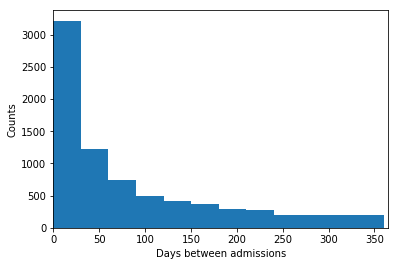

In [9]:
plt.hist(df_adm.loc[~df_adm.DAYS_NEXT_ADMIT.isnull(),'DAYS_NEXT_ADMIT'], bins =range(0,365,30))
plt.xlim([0,365])
plt.xlabel('Days between admissions')
plt.ylabel('Counts')

In [ ]:
df_notes = pd.read_csv('NOTEEVENTS.csv')

In [ ]:
df_notes.describe()